In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

import keras
from keras.models import Sequential
from keras import optimizers
from sklearn.metrics import mean_squared_error
from keras.models import load_model

Using TensorFlow backend.


In [18]:
GJ_2009 = pd.read_csv("./data/final_group_2009.csv")
GJ_2010 = pd.read_csv("./data/final_group_2010.csv")
GJ_2011 = pd.read_csv("./data/final_group_2011.csv")
GJ_2012 = pd.read_csv("./data/final_group_2012.csv")
GJ_2013 = pd.read_csv("./data/final_group_2013.csv")
GJ_2014 = pd.read_csv("./data/final_group_2014.csv")
GJ_2015 = pd.read_csv("./data/final_group_2015.csv")
GJ_2016 = pd.read_csv("./data/final_group_2016.csv")
GJ_2017 = pd.read_csv("./data/final_group_2017.csv")

# 2016년도는 알코올 변수가 없어서 제거

del GJ_2009['alcohol_2009']
del GJ_2010['alcohol_2010']
del GJ_2011['alcohol_2011']
del GJ_2012['alcohol_2012']
del GJ_2013['alcohol_2013']
del GJ_2014['alcohol_2014']
del GJ_2015['alcohol_2015']
# del GJ_2016['alcohol_2016']
del GJ_2017['alcohol_2017']

In [19]:
group_01_Y =pd.concat( [ pd.Series(GJ_2009.loc[0,'target']),pd.Series(GJ_2010.loc[0,'target']), 
                       pd.Series(GJ_2011.loc[0,'target']), pd.Series(GJ_2012.loc[0,'target']), 
                       pd.Series(GJ_2013.loc[0,'target']), pd.Series(GJ_2014.loc[0,'target']), 
                       pd.Series(GJ_2015.loc[0,'target']), pd.Series(GJ_2016.loc[0,'target']), 
                       pd.Series(GJ_2017.loc[0,'target']) ])

group_01_Y

0    0.123966
0    0.128567
0    0.127495
0    0.126737
0    0.133388
0    0.065369
0    0.070101
0    0.070171
0    0.072436
dtype: float64

In [20]:
# del GJ_2009['target']
# del GJ_2010['target']
# del GJ_2011['target']
# del GJ_2012['target']
# del GJ_2013['target']
# del GJ_2014['target']
# del GJ_2015['target']
# del GJ_2016['target']
# del GJ_2017['target']

In [21]:
GJ_01 = pd.concat([ GJ_2009.iloc[0, :], GJ_2010.iloc[0, :],GJ_2011.iloc[0, :]
           ,GJ_2012.iloc[0, :],GJ_2013.iloc[0, :],GJ_2014.iloc[0, :],GJ_2015.iloc[0, :],
           GJ_2016.iloc[0, :],GJ_2017.iloc[0, :] ], axis=0)

GJ_01.shape

(270,)

In [22]:
group_01_X = pd.DataFrame(np.array(GJ_01).reshape(9,30))

group_01_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,5.0,11.0,164.082246,64.275584,85.066084,0.835089,0.849314,1.050541,1.042505,...,25.433064,42.639791,1.882801,0.331779,0.123966,6.022633,9.439318,5.269804,9.477925,4.864434
1,1.0,5.0,11.0,164.286355,64.587731,85.115767,0.850260,0.853051,1.051059,1.044525,...,25.274991,42.498773,1.879216,0.339532,0.128567,5.447836,10.318163,5.139831,6.487352,4.312068
2,1.0,5.0,11.0,164.192092,64.525130,85.025088,0.842970,0.854034,1.046306,1.040214,...,24.761978,42.412784,1.908642,0.313033,0.127495,5.242181,9.025001,5.395798,7.162394,5.991064
3,1.0,5.0,11.0,164.198746,64.522639,85.004177,0.858097,0.857639,1.047118,1.042304,...,25.581728,42.685983,1.902737,0.341636,0.126737,5.344020,9.481327,5.324866,7.163669,5.152478
4,1.0,5.0,11.0,164.299008,64.643790,84.942024,0.867557,0.870964,1.046491,1.042075,...,25.444710,42.365930,1.912343,0.352282,0.133388,5.163603,9.145865,4.934956,7.030884,5.430357
5,1.0,5.0,11.0,173.919558,75.197807,84.784052,1.070561,1.069871,1.011224,1.010149,...,30.281621,50.007288,2.199261,0.458504,0.065369,5.642267,10.299977,4.922783,5.907340,5.093187
6,1.0,5.0,11.0,174.242687,75.816172,85.122337,1.064436,1.068575,1.011531,1.011322,...,31.107678,50.635732,2.173336,0.456646,0.070101,5.862395,8.605695,5.185965,6.613984,5.336282
7,1.0,5.0,11.0,170.479056,72.408390,85.412760,1.073057,1.071174,1.010183,1.010425,...,31.076026,51.031457,2.205851,0.447156,0.070171,5.716449,8.174336,4.785431,6.610226,5.735070
8,1.0,5.0,11.0,170.454959,72.630210,85.666327,1.068981,1.072022,1.010127,1.009610,...,31.658272,50.963437,2.177280,0.444054,0.072436,4.928141,8.545803,5.020429,5.020429,4.965056


In [23]:
group_01_X.shape, group_01_Y.shape

((9, 30), (9,))

In [28]:
# group_01_Y = np.array(group_01_Y[0])

group_01_Y = pd.DataFrame(group_01_Y)
group_01_Y

,0
0,0.123966
0,0.128567
0,0.127495
0,0.126737
0,0.133388
0,0.065369
0,0.070101
0,0.070171
0,0.072436


In [34]:
seq_length = 3


dataX= []
dataY= []

for i in range(0, int( len(group_01_Y) - seq_length)):
    _x = group_01_X[i : i+seq_length]
    _x = np.array(_x)
#     print(_x.shape)
    _y = group_01_Y.iloc[i + seq_length, 0]
    _y = np.array(_y)
    dataX.append(_x) # dataX 리스트에 추가 / add to dataX's list
    dataY.append(_y) # dataY 리스트에 추가 / add to dataY's list

In [35]:
np.array(dataX).shape,  np.array(dataY).shape

((6, 3, 30), (6,))

In [36]:
dataX

[array([[1.00000000e+00, 5.00000000e+00, 1.10000000e+01, 1.64082246e+02,
         6.42755837e+01, 8.50660841e+01, 8.35089219e-01, 8.49313672e-01,
         1.05054117e+00, 1.04250466e+00, 1.29345015e+02, 7.89129325e+01,
         1.92217361e+02, 1.40810970e+02, 5.27624354e+01, 1.13124993e+02,
         1.44931360e+01, 1.13006880e+00, 1.12017314e+00, 2.67639476e+01,
         2.54330641e+01, 4.26397911e+01, 1.88280093e+00, 3.31779367e-01,
         1.23965979e-01, 6.02263263e+00, 9.43931844e+00, 5.26980355e+00,
         9.47792506e+00, 4.86443404e+00],
        [1.00000000e+00, 5.00000000e+00, 1.10000000e+01, 1.64286355e+02,
         6.45877308e+01, 8.51157669e+01, 8.50259745e-01, 8.53050739e-01,
         1.05105886e+00, 1.04452524e+00, 1.29169858e+02, 7.88090421e+01,
         1.91407274e+02, 1.39961139e+02, 5.18985074e+01, 1.12485486e+02,
         1.45482888e+01, 1.11442640e+00, 1.08628363e+00, 2.65144846e+01,
         2.52749907e+01, 4.24987734e+01, 1.87921622e+00, 3.39532212e-01,
         

In [37]:
# 학습용/테스트용 데이터 생성
train_size = int(len(dataY) * 0.9)
test_size = len(dataY) - train_size

train_size

5

In [38]:
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])

In [39]:
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

In [40]:
trainX.shape, trainY.shape ,  testX.shape, testY.shape

((5, 3, 30), (5,), (1, 3, 30), (1,))

In [43]:
## LSTM 모델

input_columns = 30

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, input_columns) , return_sequences=True, stateful=False))
model.add(LSTM(128, return_sequences=False, stateful=False))
model.add(Dense(1))
model.add(Activation('linear'))
# , dropout=0.2

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 128)            81408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 213,121
Trainable params: 213,121
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 모델 학습 설정 및 진행
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
print("="*50)
hist = model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=1, validation_data=(testX, testY))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 128)            81408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 213,121
Trainable params: 213,121
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 5 samples, validate on 1 samples
Epoch 1/100
5/5 [==============================] - 3s 505ms/step - loss: 0.0363 - val_loss: 0.0089
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0281 -

5/5 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 3.6090e-05
Epoch 70/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 71/100
5/5 [==============================] - 0s 6ms/step - loss: 7.6060e-04 - val_loss: 4.2261e-05
Epoch 72/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 4.4144e-05
Epoch 73/100
5/5 [==============================] - 0s 5ms/step - loss: 8.4205e-04 - val_loss: 0.0029
Epoch 74/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 7.2656e-05
Epoch 75/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 3.8106e-04
Epoch 76/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 77/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 6.8593e-04
Epoch 78/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 3.7760e-

No handles with labels found to put in legend.


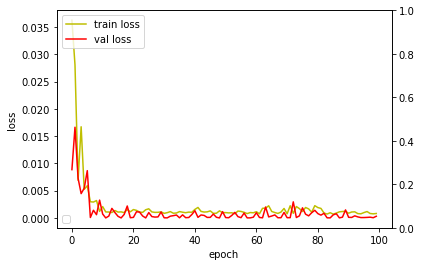

''

In [45]:
# 학습 과정 살펴보기
import matplotlib.pyplot as plt
%matplotlib inline

# print(hist.history['loss'])
# print(hist.history['val_loss'])
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
;

In [48]:
y_pred = model.predict(testX)

In [49]:
testY, y_pred , testX.shape

(array([0.07243579]), array([[0.08981748]], dtype=float32), (1, 3, 30))

1/1 [==============================] - 0s 3ms/step


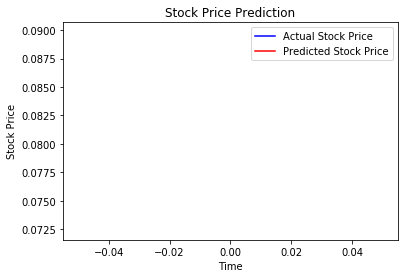

In [50]:
# 예측
y_pred_17 = model.predict(testX, batch_size=1, verbose=1) # , steps=5
plt.plot(testY, color = 'blue', label = 'Actual Stock Price')
plt.plot(y_pred, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [72]:
group_01_X

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,5.0,11.0,164.082246,64.275584,85.066084,0.835089,0.849314,1.050541,1.042505,...,26.763948,25.433064,42.639791,1.882801,0.331779,6.022633,9.439318,5.269804,9.477925,4.864434
1,1.0,5.0,11.0,164.286355,64.587731,85.115767,0.850260,0.853051,1.051059,1.044525,...,26.514485,25.274991,42.498773,1.879216,0.339532,5.447836,10.318163,5.139831,6.487352,4.312068
2,1.0,5.0,11.0,164.192092,64.525130,85.025088,0.842970,0.854034,1.046306,1.040214,...,26.404203,24.761978,42.412784,1.908642,0.313033,5.242181,9.025001,5.395798,7.162394,5.991064
3,1.0,5.0,11.0,164.198746,64.522639,85.004177,0.858097,0.857639,1.047118,1.042304,...,26.956529,25.581728,42.685983,1.902737,0.341636,5.344020,9.481327,5.324866,7.163669,5.152478
4,1.0,5.0,11.0,164.299008,64.643790,84.942024,0.867557,0.870964,1.046491,1.042075,...,26.880975,25.444710,42.365930,1.912343,0.352282,5.163603,9.145865,4.934956,7.030884,5.430357
5,1.0,5.0,11.0,173.919558,75.197807,84.784052,1.070561,1.069871,1.011224,1.010149,...,26.435925,30.281621,50.007288,2.199261,0.458504,5.642267,10.299977,4.922783,5.907340,5.093187
6,1.0,5.0,11.0,174.242687,75.816172,85.122337,1.064436,1.068575,1.011531,1.011322,...,26.859070,31.107678,50.635732,2.173336,0.456646,5.862395,8.605695,5.185965,6.613984,5.336282
7,1.0,5.0,11.0,170.479056,72.408390,85.412760,1.073057,1.071174,1.010183,1.010425,...,26.545301,31.076026,51.031457,2.205851,0.447156,5.716449,8.174336,4.785431,6.610226,5.735070
8,1.0,5.0,11.0,170.454959,72.630210,85.666327,1.068981,1.072022,1.010127,1.009610,...,27.067681,31.658272,50.963437,2.177280,0.444054,4.928141,8.545803,5.020429,5.020429,4.965056


In [51]:
# 2015, 2016, 2017 - 3개년 X값들

group_01_X[-3:]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
6,1.0,5.0,11.0,174.242687,75.816172,85.122337,1.064436,1.068575,1.011531,1.011322,...,31.107678,50.635732,2.173336,0.456646,0.070101,5.862395,8.605695,5.185965,6.613984,5.336282
7,1.0,5.0,11.0,170.479056,72.408390,85.412760,1.073057,1.071174,1.010183,1.010425,...,31.076026,51.031457,2.205851,0.447156,0.070171,5.716449,8.174336,4.785431,6.610226,5.735070
8,1.0,5.0,11.0,170.454959,72.630210,85.666327,1.068981,1.072022,1.010127,1.009610,...,31.658272,50.963437,2.177280,0.444054,0.072436,4.928141,8.545803,5.020429,5.020429,4.965056


In [52]:
# 2018년 Y예측

test_2018 = list()

test_2018_X = group_01_X[-3:]
test_2018_X = np.array(test_2018_X)
test_2018.append(test_2018_X)

test_2018 = np.array(test_2018)

test_2018.shape

(1, 3, 30)

In [53]:
y_pred_18 = model.predict(test_2018, batch_size=1)
y_pred_18

array([[0.09020257]], dtype=float32)

In [54]:
testY

array([0.07243579])